In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 89% 145M/163M [00:00<00:00, 183MB/s]
100% 163M/163M [00:00<00:00, 172MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_981.jpg', 'with_mask_163.jpg', 'with_mask_1867.jpg', 'with_mask_3613.jpg', 'with_mask_2416.jpg']
['with_mask_3508.jpg', 'with_mask_1155.jpg', 'with_mask_2412.jpg', 'with_mask_1946.jpg', 'with_mask_594.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3059.jpg', 'without_mask_701.jpg', 'without_mask_3734.jpg', 'without_mask_689.jpg', 'without_mask_3313.jpg']
['without_mask_844.jpg', 'without_mask_3489.jpg', 'without_mask_472.jpg', 'without_mask_922.jpg', 'without_mask_2247.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

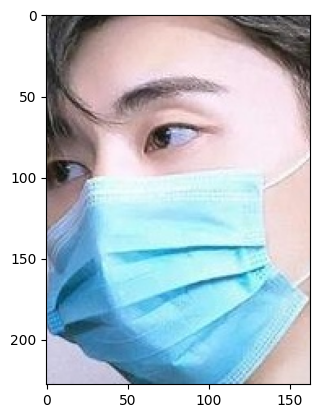

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

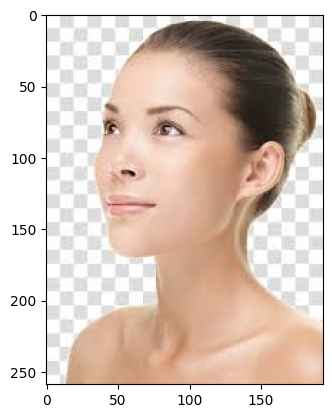

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[57, 55, 68],
        [57, 55, 68],
        [56, 54, 67],
        ...,
        [70, 69, 75],
        [71, 70, 75],
        [71, 70, 75]],

       [[57, 55, 68],
        [58, 56, 69],
        [57, 55, 68],
        ...,
        [69, 68, 73],
        [69, 68, 73],
        [69, 68, 73]],

       [[58, 56, 69],
        [58, 56, 69],
        [55, 53, 66],
        ...,
        [66, 65, 70],
        [65, 64, 69],
        [65, 64, 69]],

       ...,

       [[35, 38, 53],
        [33, 36, 51],
        [28, 33, 47],
        ...,
        [27, 26, 33],
        [27, 26, 34],
        [27, 26, 34]],

       [[34, 39, 52],
        [32, 37, 50],
        [28, 34, 47],
        ...,
        [26, 25, 31],
        [26, 25, 32],
        [26, 25, 32]],

       [[34, 40, 52],
        [32, 38, 50],
        [28, 34, 46],
        ...,
        [26, 25, 30],
        [26, 25, 31],
        [26, 25, 31]]], dtype=uint8)
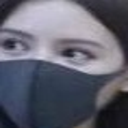

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[195, 156, 127],
        [195, 153, 126],
        [193, 148, 123],
        ...,
        [228, 184, 196],
        [225, 181, 193],
        [223, 178, 191]],

       [[194, 153, 125],
        [194, 151, 124],
        [192, 147, 122],
        ...,
        [228, 185, 196],
        [225, 182, 193],
        [223, 181, 192]],

       [[191, 148, 121],
        [191, 147, 121],
        [191, 144, 119],
        ...,
        [229, 189, 198],
        [226, 187, 196],
        [224, 186, 195]],

       ...,

       [[227, 199, 174],
        [227, 199, 174],
        [227, 199, 172],
        ...,
        [247, 211, 181],
        [249, 216, 186],
        [250, 218, 189]],

       [[217, 185, 159],
        [217, 186, 159],
        [219, 188, 160],
        ...,
        [250, 216, 186],
        [252, 219, 190],
        [252, 220, 193]],

       [[212, 177, 151],
        [212, 179, 151],
        [214, 182, 154],
        ...,
        [251, 219, 189],
        [253, 220, 192],
        [253, 221, 194]]], dtype=uint8)
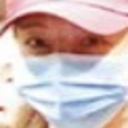

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.76470588, 0.61176471, 0.49803922],
        [0.76470588, 0.6       , 0.49411765],
        [0.75686275, 0.58039216, 0.48235294],
        ...,
        [0.89411765, 0.72156863, 0.76862745],
        [0.88235294, 0.70980392, 0.75686275],
        [0.8745098 , 0.69803922, 0.74901961]],

       [[0.76078431, 0.6       , 0.49019608],
        [0.76078431, 0.59215686, 0.48627451],
        [0.75294118, 0.57647059, 0.47843137],
        ...,
        [0.89411765, 0.7254902 , 0.76862745],
        [0.88235294, 0.71372549, 0.75686275],
        [0.8745098 , 0.70980392, 0.75294118]],

       [[0.74901961, 0.58039216, 0.4745098 ],
        [0.74901961, 0.57647059, 0.4745098 ],
        [0.74901961, 0.56470588, 0.46666667],
        ...,
        [0.89803922, 0.74117647, 0.77647059],
        [0.88627451, 0.73333333, 0.76862745],
        [0.87843137, 0.72941176, 0.76470588]],

       ...,

       [[0.89019608, 0.78039216, 0.68235294],
        [0.89019608, 0.78039216, 0.68235294],
        [0.89019608, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 23ms/step - loss: 0.4777 - acc: 0.7863 - val_loss: 0.2731 - val_acc: 0.8893
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2873 - acc: 0.8839 - val_loss: 0.2565 - val_acc: 0.9025
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2379 - acc: 0.9007 - val_loss: 0.2281 - val_acc: 0.9091
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2121 - acc: 0.9169 - val_loss: 0.2738 - val_acc: 0.9174
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1784 - acc: 0.9285 - val_loss: 0.2025 - val_acc: 0.9372


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2183 - acc: 0.9047
Test Accuracy = 0.9046988487243652


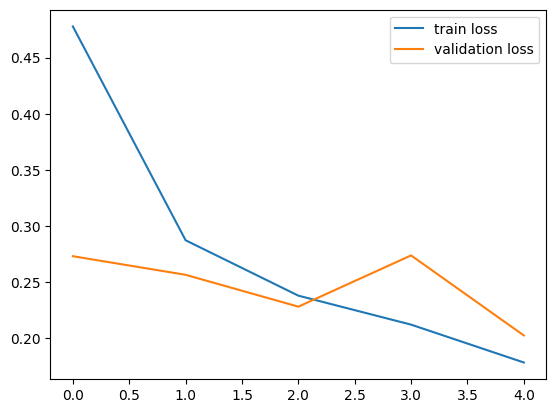

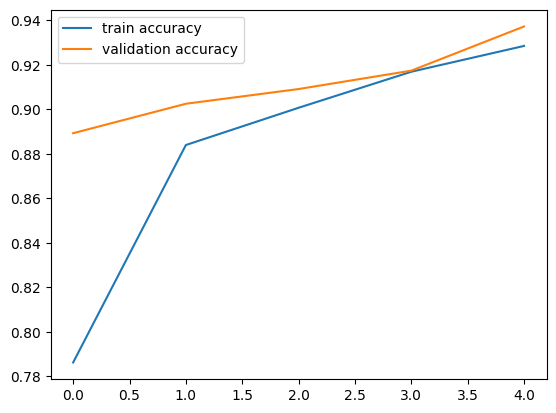

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_3508.jpg


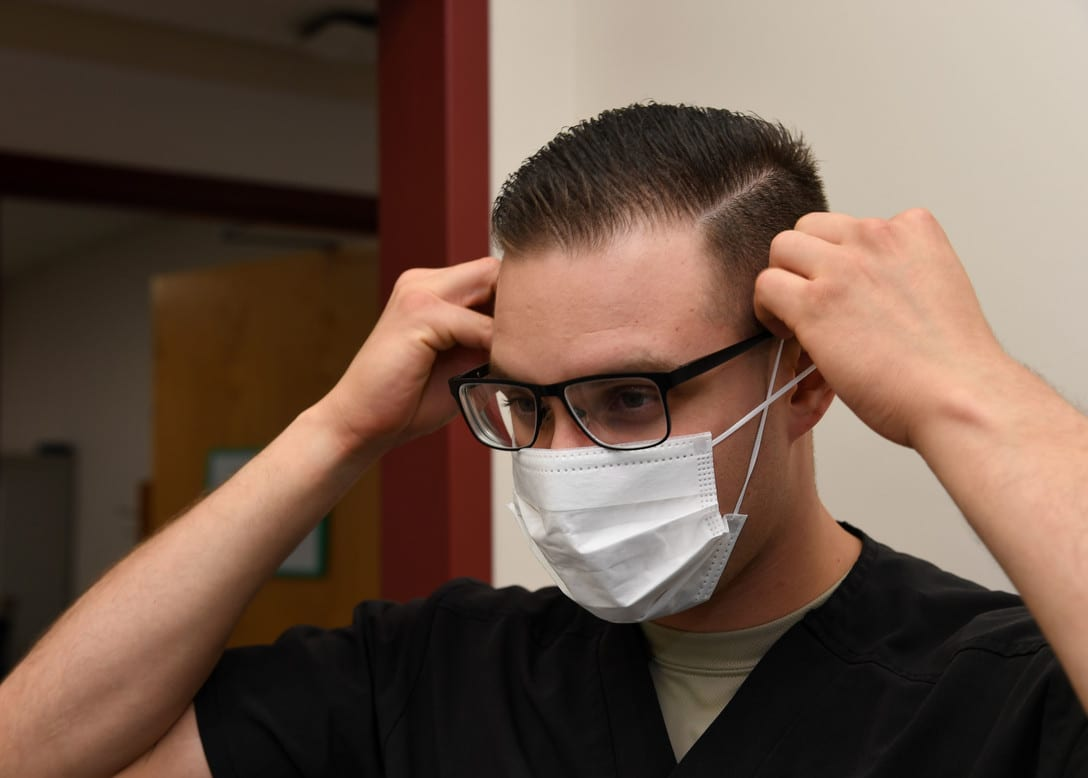

1/1 [==============================] - 0s 35ms/step
[[0.25771347 0.7706152 ]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')